In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.interpolate import make_interp_spline
%config InlineBackend.figure_format = 'retina'

In [2]:
# загружаем данные
df = pd.read_csv('Data/spurious_correlations.csv', sep=';')

In [3]:
# подготавливаем данные
x_new = np.linspace(df['Год'].min(), 
                    df['Год'].max(), 300)
Nic_Cage_smooth = make_interp_spline(
    df['Год'],
    df['Количество фильмов с Николасом Кейджем'],
    k=3,
    bc_type='natural')(x_new)
pool_drownings_smooth = make_interp_spline(
    df['Год'],
    df['Количество людей, которые утонули, упав в бассейн'],
    k=3,
    bc_type='natural')(x_new)

df2 = pd.DataFrame(
    {'Год': x_new,
    'Количество фильмов с Николасом Кейджем': Nic_Cage_smooth,
    'Количество людей, которые утонули, упав в бассейн': pool_drownings_smooth})

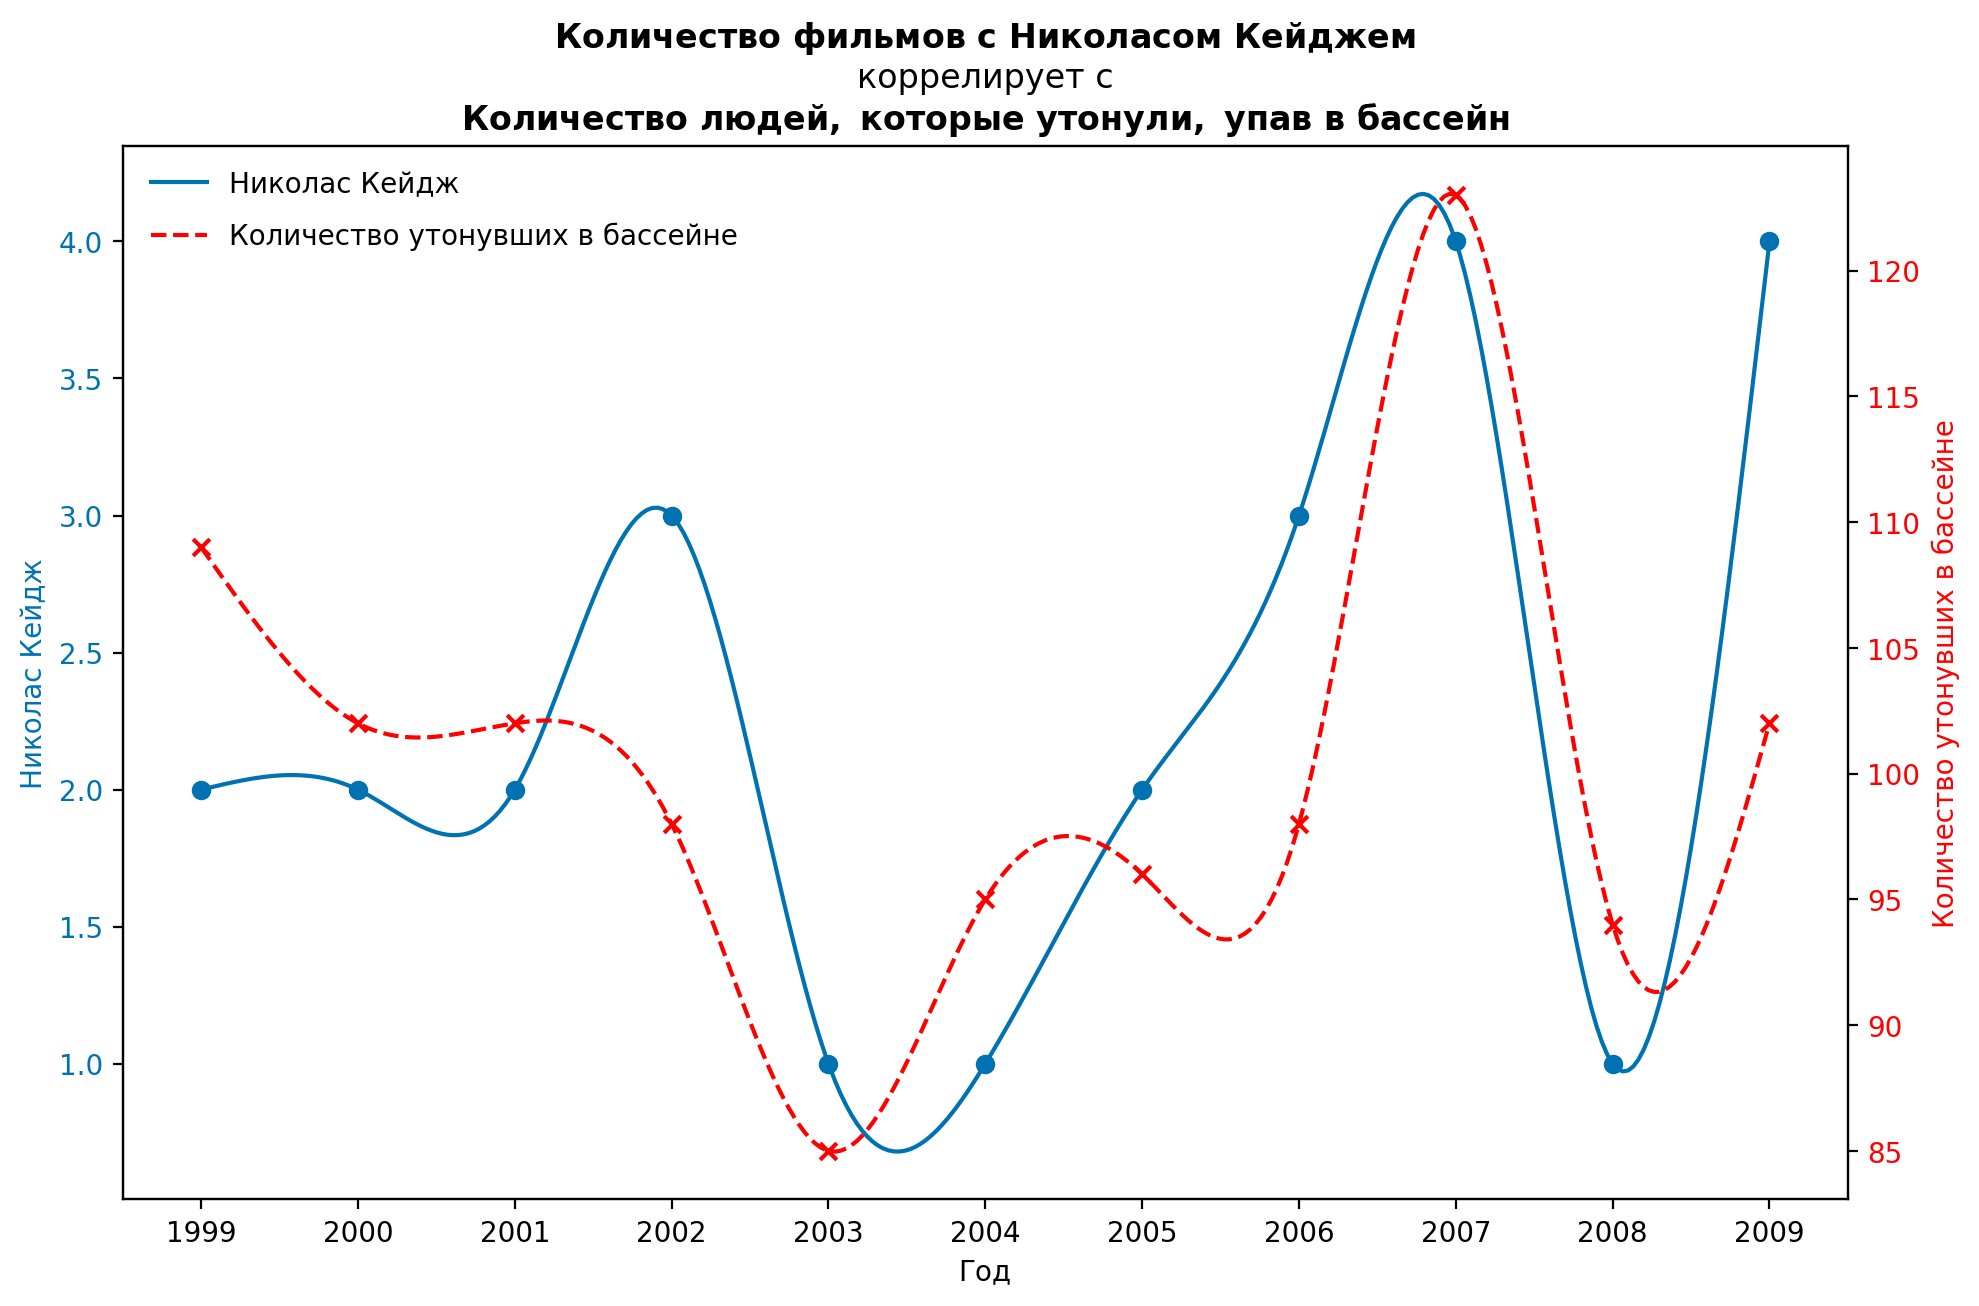

In [4]:
# визуализируем данные
fig, ax1 = plt.subplots(figsize=(10, 6))
color = '#0072B2'
ax1.set_xlabel('Год')
ax1.set_ylabel('Николас Кейдж', 
               color=color)
ax1.plot(df2['Год'], 
         df2['Количество фильмов с Николасом Кейджем'],
         color=color, 
         ls='-', 
         label='Николас Кейдж')
ax1.scatter(df['Год'], 
            df['Количество фильмов с Николасом Кейджем'], 
            color=color,
            marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc=(0.01, .94), frameon=False)
ax2 = ax1.twinx()

color = 'r'
ax2.set_ylabel('Количество утонувших в бассейне', 
               color=color)
ax2.plot(df2['Год'], 
         df2['Количество людей, которые утонули, упав в бассейн'], 
         color=color, 
         ls='--', 
         label='Количество утонувших в бассейне')
ax2.scatter(df['Год'], 
            df['Количество людей, которые утонули, упав в бассейн'], 
            color=color, 
            marker='x')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc=(0.01, .89), frameon=False)

fig.tight_layout()
plt.title(r'$\bfКоличество\ фильмов\ с\ Николасом\ Кейджем$' +
          '\nкоррелирует с\n' +
          r'$\bfКоличество\ людей,\ которые\ утонули,\ упав\ в\ бассейн$')
plt.xticks(ticks=df['Год'].tolist(), labels=df['Год'].tolist())
plt.show()

In [5]:
# загружаем и подготавливаем данные
data = pd.read_csv('Data/instagram_natgeo.csv')
data['created_time'] = pd.to_datetime(data['Date'])
df = data[(data['created_time'] >= '2015-01-01') & 
          (data['created_time'] < '2016-01-01')][
    ['created_time', 'Average Likes Per Photo']]
df = df.groupby([df['created_time'].dt.date]).mean().reset_index()
df['likes'] = df['Average Likes Per Photo'] / 1000

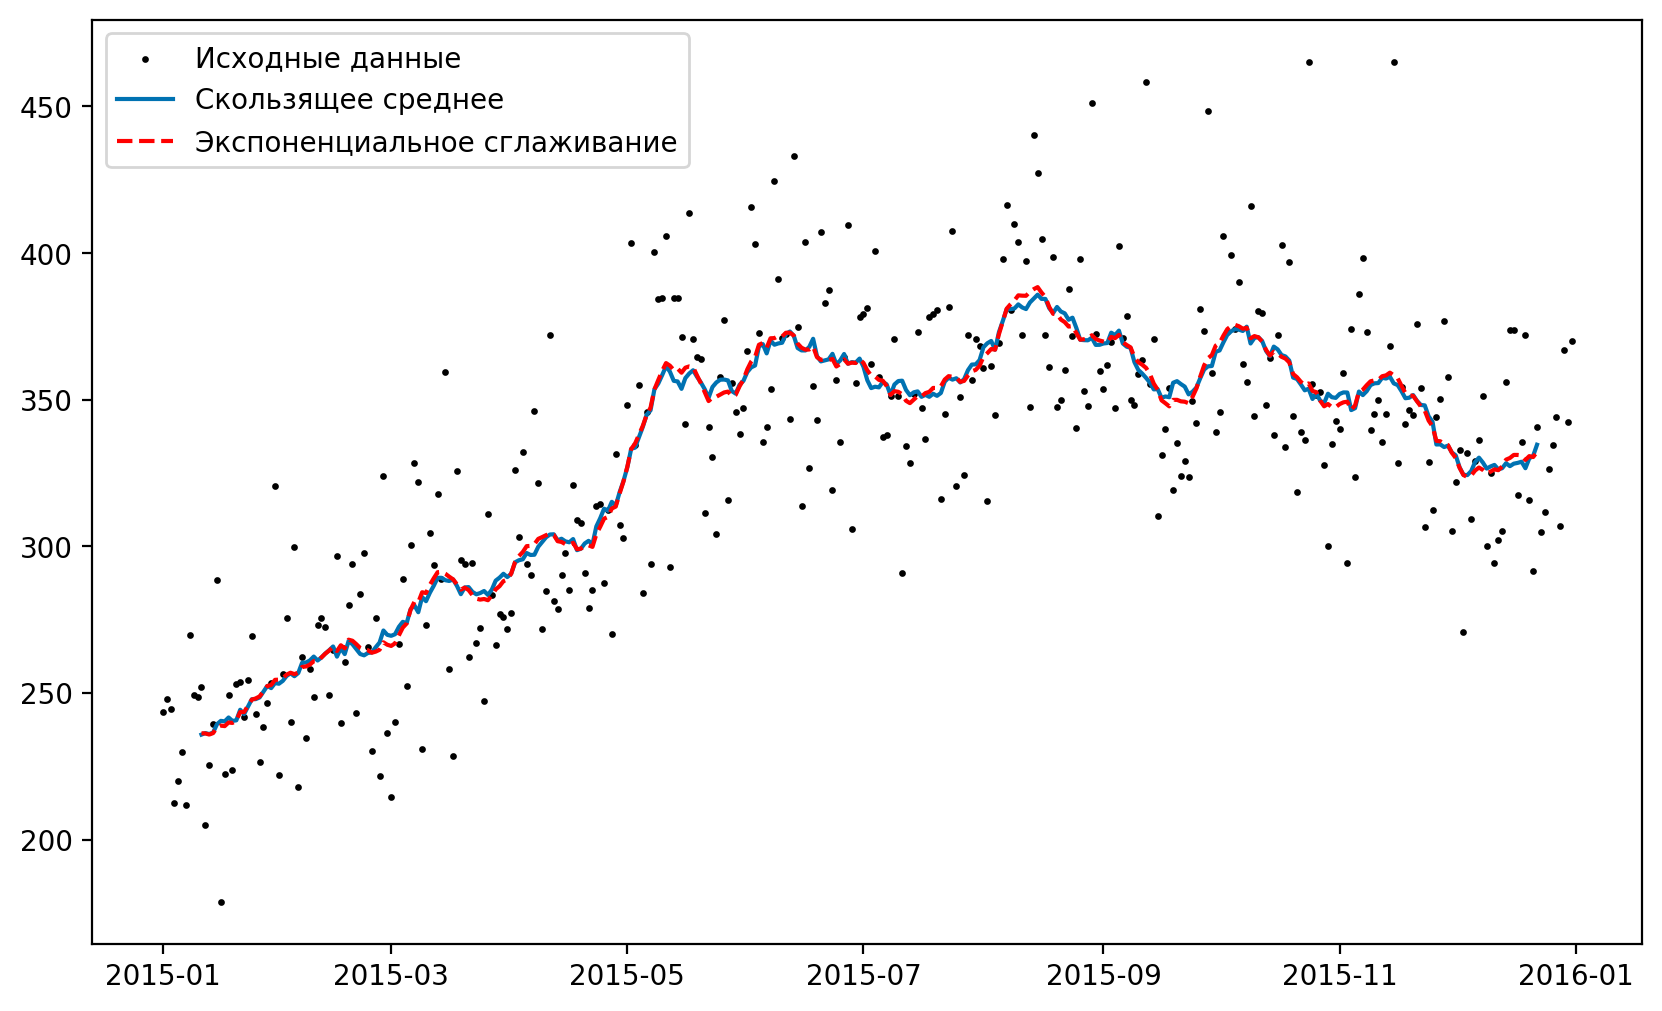

In [6]:
# визуализируем данные
plt.figure(figsize=(10, 6))
plt.scatter(df['created_time'], 
            df['likes'], 
            label='Исходные данные', 
            c='k', 
            s=2)
plt.plot(df['created_time'],
         df['likes'].rolling(window=20, center=True).mean(),
         label='Скользящее среднее',
         ls='-',
         c='#0072B2')
plt.plot(df['created_time'],
         df['likes'].rolling(window=20, 
                             center=True, 
                             win_type='exponential').mean(tau=10),
         label='Экспоненциальное сглаживание',
         ls='--',
         c='r')
plt.legend()
plt.show()

In [7]:
# создаем данные
x = np.arange(0, 100, .5)
y1 = [25 + .5 * val + 7 * random.random() for val in x]
y2 = [.5 * val + 3 * (random.random() - .5) * val / 7 for val in x]

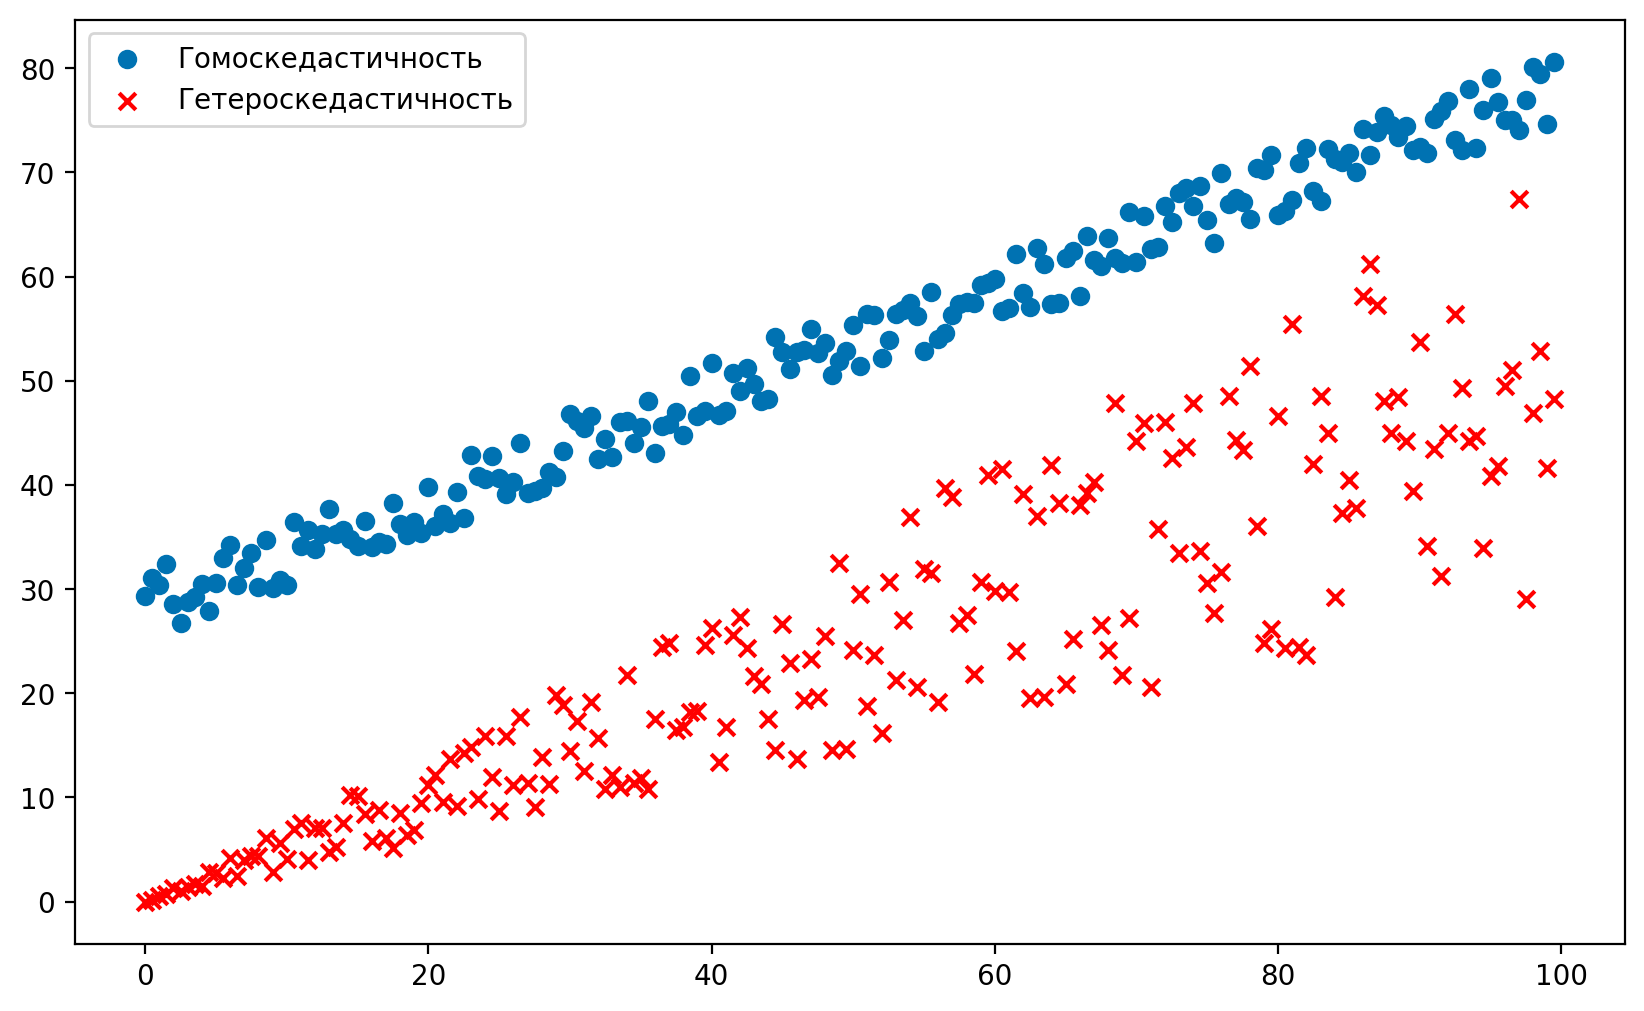

In [8]:
# визуализируем данные
plt.figure(figsize=(10, 6))
plt.scatter(x, 
            y1, 
            label='Гомоскедастичность', 
            marker='o', 
            c='#0072B2')
plt.scatter(x, 
            y2, 
            label='Гетероскедастичность', 
            marker='x', 
            c='r')
plt.legend()
plt.show()